# Microeconometrics-Preventive-Behavior-COVID

In [1]:
cd "/Users/alessandrocalzolaio/Desktop/Unipd/MAGISTRALE/ECONOMETRIC ANALYSIS/Python_EC"

/Users/alessandrocalzolaio/Desktop/Unipd/MAGISTRALE/ECONOMETRIC ANALYSIS/Python_EC


In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from patsy import dmatrices
import matplotlib.pyplot as plt
from statsmodels.iolib.summary2 import summary_col
import csv
import scipy as stats
from linearmodels.iv import IV2SLS, IVGMM
from statsmodels.api import add_constant
from linearmodels.iv.results import compare
from statsmodels.discrete.discrete_model import Probit,Logit
from scipy.stats import norm
import math
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from statsmodels.stats.diagnostic import het_breuschpagan

import warnings
warnings.filterwarnings('ignore')

1 DESCRIBE THE DATA. FOR EXAMPLE, HOW DOES THE PREVENTIVE BEHAVIOUR VARY BY COUNTRY?

We are working on cross-sectional data, that refers to data collected at a given point in time. Cross-sectional studies allow researchers to collect information from a large pool of subjects and compare differences between groups.


The shape of our dataset is of 35284 rows and 35 columns.


When we describe our data with the describe command we are able to show descriptive statistics for each variable.
In our case the country category allows us to catch up different snapshots of each country during the pandemic. For instance we observe that Luxembourg together with Italy and Spain are the most law-abiding countries among the ones considered. The least law-abiding one is Greece. These differences that we see when simply describing our data by taking a first glance at it may hold or may fall apart once we actually run the regression controlling for all the relevant variables, which is what we will do in the next part of the Homework. 


In our case we use the groupby command to compute conditional moments (mean of alwaysdis conditional on country of residence) and then we build a graph, from which we can derive one additional observation: regardless of the country, females always tend to keep the distance more with respect to men. Indeed the green line always lies below the orange one. 


When we look at the variables that have missing values we see that the isced variable has 1382 null values, this is because it is used as reference category.

In [3]:
df = pd.read_csv('group1.csv')

In [4]:
df.shape

(35284, 35)

In [5]:
df.head()

,country,isced,retired,age,female,couple,alwaysdis,eligibleSR,id,age2,...,Portugal,Slovenia,Estonia,Croatia,isced1,isced2,isced3,isced4,isced5,isced6
0,Belgium,Isced-97 code 2,0,61,0,1,1,0,809,3721,...,0,0,0,0,0,1,0,0,0,0
1,Belgium,Isced-97 code 3,0,61,1,1,1,0,810,3721,...,0,0,0,0,0,0,1,0,0,0
2,Belgium,Isced-97 code 5,1,74,0,1,1,1,811,5476,...,0,0,0,0,0,0,0,0,1,0
3,Belgium,Isced-97 code 5,0,58,1,0,0,0,812,3364,...,0,0,0,0,0,0,0,0,1,0
4,Belgium,Isced-97 code 5,1,85,0,0,1,1,814,7225,...,0,0,0,0,0,0,0,0,1,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35284 entries, 0 to 35283
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   country        35284 non-null  object
 1   isced          33902 non-null  object
 2   retired        35284 non-null  int64 
 3   age            35284 non-null  int64 
 4   female         35284 non-null  int64 
 5   couple         35284 non-null  int64 
 6   alwaysdis      35284 non-null  int64 
 7   eligibleSR     35284 non-null  int64 
 8   id             35284 non-null  int64 
 9   age2           35284 non-null  int64 
 10  Germany        35284 non-null  int64 
 11  Sweden         35284 non-null  int64 
 12  Netherland     35284 non-null  int64 
 13  Spain          35284 non-null  int64 
 14  Italy          35284 non-null  int64 
 15  France         35284 non-null  int64 
 16  Denmark        35284 non-null  int64 
 17  Greece         35284 non-null  int64 
 18  Switzerland    35284 non-n

In [7]:
df.isnull().sum()

country             0
isced            1382
retired             0
age                 0
female              0
couple              0
alwaysdis           0
eligibleSR          0
id                  0
age2                0
Germany             0
Sweden              0
Netherland          0
Spain               0
Italy               0
France              0
Denmark             0
Greece              0
Switzerland         0
Belgium             0
Israel              0
CzechRepublic       0
Poland              0
Luxembourg          0
Hungary             0
Portugal            0
Slovenia            0
Estonia             0
Croatia             0
isced1              0
isced2              0
isced3              0
isced4              0
isced5              0
isced6              0
dtype: int64

In [8]:
df.describe()

,retired,age,female,couple,alwaysdis,eligibleSR,id,age2,Germany,Sweden,...,Portugal,Slovenia,Estonia,Croatia,isced1,isced2,isced3,isced4,isced5,isced6
count,35284.000000,35284.000000,35284.000000,35284.000000,35284.000000,35284.000000,35284.000000,35284.000000,35284.000000,35284.000000,...,35284.000000,35284.000000,35284.000000,35284.000000,35284.000000,35284.000000,35284.000000,35284.000000,35284.000000,35284.000000
mean,0.795290,71.345624,0.546367,0.687309,0.801922,0.793334,23189.513519,5163.027860,0.067283,0.035228,...,0.024912,0.075898,0.112912,0.044099,0.126318,0.174725,0.353645,0.052120,0.245154,0.008871
std,0.403496,8.534158,0.497853,0.463596,0.398557,0.404919,13774.852674,1226.475451,0.250514,0.184359,...,0.155860,0.264839,0.316490,0.205319,0.332212,0.379737,0.478107,0.222272,0.430184,0.093768
min,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000,809.000000,2500.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,65.000000,0.000000,0.000000,1.000000,1.000000,11366.750000,4225.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,71.000000,1.000000,1.000000,1.000000,1.000000,22765.500000,5041.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,78.000000,1.000000,1.000000,1.000000,1.000000,33498.250000,6084.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,90.000000,1.000000,1.000000,1.000000,1.000000,48138.000000,8100.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df.groupby('country')['alwaysdis'].mean()

country
Belgium           0.830940
Croatia           0.762853
Czech Republic    0.773143
Denmark           0.852826
Estonia           0.796185
France            0.742200
Germany           0.812131
Greece            0.608696
Hungary           0.824766
Israel            0.731878
Italy             0.913840
Luxembourg        0.914925
Netherlands       0.744268
Poland            0.775054
Portugal          0.883959
Slovenia          0.858476
Spain             0.915947
Sweden            0.745776
Switzerland       0.807125
Name: alwaysdis, dtype: float64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'Belgium'),
  Text(1, 0, 'Croatia'),
  Text(2, 0, 'Czech Republic'),
  Text(3, 0, 'Denmark'),
  Text(4, 0, 'Estonia'),
  Text(5, 0, 'France'),
  Text(6, 0, 'Germany'),
  Text(7, 0, 'Greece'),
  Text(8, 0, 'Hungary'),
  Text(9, 0, 'Israel'),
  Text(10, 0, 'Italy'),
  Text(11, 0, 'Luxembourg'),
  Text(12, 0, 'Netherlands'),
  Text(13, 0, 'Poland'),
  Text(14, 0, 'Portugal'),
  Text(15, 0, 'Slovenia'),
  Text(16, 0, 'Spain'),
  Text(17, 0, 'Sweden'),
  Text(18, 0, 'Switzerland')])

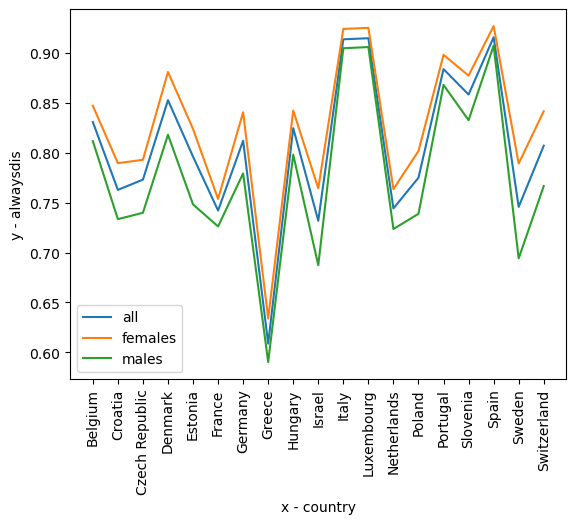

In [10]:
plt.plot(df.groupby('country')['alwaysdis'].mean(), label="all")
plt.plot(df[df["female"]==1].groupby('country')['alwaysdis'].mean(), label="females")
plt.plot(df[df["female"]==0].groupby('country')['alwaysdis'].mean(), label="males")
plt.xlabel('x - country')
plt.ylabel('y - alwaysdis')
plt.legend()
plt.xticks(rotation='vertical')

2 ESTIMATE WITH OLS A MODEL RELATING THE PREVENTIVE BEHAVIOUR (ALWAYSDIST) WITH BEING RETIRED, AGE, BEING COUPLE, GENDER, EDUCATION AND COUNTRY RESIDENCE. 

In [11]:
df = pd.read_csv('group1.csv')
y, x = dmatrices('alwaysdis ~ retired + age + age2 + couple + female + isced1 + isced2 + isced3 + isced4 + isced5 + isced6 + Germany + Sweden + Netherland + Spain + France + Denmark + Greece + Switzerland + Belgium + Israel + CzechRepublic + Poland + Luxembourg + Hungary + Portugal + Slovenia + Estonia + Croatia', data=df, return_type='dataframe')

model = sm.OLS(y, x).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              alwaysdis   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     56.52
Date:                Wed, 29 Nov 2023   Prob (F-statistic):          6.89e-320
Time:                        16:54:12   Log-Likelihood:                -16806.
No. Observations:               35284   AIC:                         3.367e+04
Df Residuals:                   35254   BIC:                         3.393e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.7859      0.156      5.022      0.000       0.479       1.093
retired           0.0342      0.008      4.324      0.000       0.019       0.050
age           -1.175e-05      0.004     -0.003      0.998      -0.009       0.009
age2            1.75e-05   2.95e-05      0.592      0.554   -4.04e-05    7.54e-05
couple            0.0219      0.005      4.568      0.000       0.013       0.031
female            0.0575      0.004     13.192      0.000       0.049       0.066
isced1           -0.0482      0.012     -3.894      0.000      -0.073      -0.024
isced2           -0.0318      0.012     -2.621      0.009      -0.056      -0.008
isced3           -0.0283      0.012     -2.394      0.017      -0.051      -0.005
isced4           -0.0302      0.015     -2.042      0.041      -0.059      -0.001
isced5           -0.0359      0.012     -2.984      0.003      -0.059      -0.012
isced6           -0.0228      0.025     -0.917      0.359      -0.071       0.026
Germany          -0.1021      0.011     -8.883      0.000      -0.125      -0.080
Sweden           -0.1741      0.014    -12.752      0.000      -0.201      -0.147
Netherland       -0.1694      0.018     -9.291      0.000      -0.205      -0.134
Spain            -0.0027      0.013     -0.203      0.839      -0.029       0.024
France           -0.1777      0.012    -14.657      0.000      -0.201      -0.154
Denmark          -0.0545      0.012     -4.409      0.000      -0.079      -0.030
Greece           -0.3064      0.011    -27.040      0.000      -0.329      -0.284
Switzerland      -0.1116      0.013     -8.810      0.000      -0.136      -0.087
Belgium          -0.0802      0.011     -7.519      0.000      -0.101      -0.059
Israel           -0.1896      0.014    -13.492      0.000      -0.217      -0.162
CzechRepublic    -0.1526      0.011    -13.633      0.000      -0.175      -0.131
Poland           -0.1368      0.011    -12.003      0.000      -0.159      -0.114
Luxembourg        0.0063      0.017      0.372      0.710      -0.027       0.040
Hungary          -0.0987      0.016     -6.307      0.000      -0.129      -0.068
Portugal         -0.0267      0.015     -1.735      0.083      -0.057       0.003
Slovenia         -0.0661      0.011     -5.985      0.000      -0.088      -0.044
Estonia          -0.1224      0.010    -11.868      0.000      -0.143      -0.102
Croatia          -0.1543      0.013    -12.081      0.000      -0.179      -0.129
==============================================================================
Omnibus:                     6956.864   Durbin-Watson:                   1.849
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12028.770
Skew:                          -1.422   Prob(JB):                         0.00
Kurtosis:                       3.302   Cond. No.            

(a) Which type of model are you estimating?

The model we are estimating is a multiple regression. It is a linear model so a variation of the indipendent variable by 1 (keeping the other variables costant) changes the dependent variable alwaysdist by the coefficient of that variable. 

$$alwaysdis = \beta_0 + \beta_1retired + \beta_2age+ \beta_3age2 + \beta_4couple + \beta_5female + \beta_6isced1 + \beta_7isced2 + \beta_8isced3 + \beta_9isced4 + \beta_{10}isced5 +\beta_{11}isced6 +\beta_{12}Germany + \beta_{13}Sweden + \beta_{14}Netherland + \beta_{15}Spain + \beta_{16}France +\beta_{17}Denmark +\beta_{18}Greece + \beta_{19}Switzerland + \beta_{20}Belgium + \beta_{21}Israel + \beta_{22}CzechRepublic +\beta_{23}Poland +\beta_{24}Luxembourg + \beta_{25}Hungary + \beta_{26}Portugal + \beta_{27}Slovenia + \beta_{28}Estonia +\beta_{29}Croatia + e$$

So, for example, if the dummy variable retired is equal to 1 then alwaysdist changes by 0.0342. Other important features we have to consider while we are estimating our model are: 
- t statistic (to check if the parameter is statistically significant)
- F statistic (to check if the parameters are jointly statistically significant)
To avoid the dummies trap we use Italy as our excluded reference category for the country category. 

(b) which standard errors do you need to use and why? 

In [12]:
x = sm.add_constant(x)
_, p_value, _, _ = het_breuschpagan(model.resid, x)
print(f"P-value for Breusch-Pagan test: {p_value}")
if p_value < 0.05:
    print("The test suggests the presence of heteroskedasticity.")
else:
    print("There is no strong evidence of heteroskedasticity.")


P-value for Breusch-Pagan test: 1.572483699207284e-268
The test suggests the presence of heteroskedasticity.


In [13]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_white
white_test = het_white(model.resid, model.model.exog)
print("White test statistic:", white_test[0])
print("P-value:", white_test[1])

White test statistic: 1695.314738845429
P-value: 4.062380982483537e-207


We carry Breush-Pagan and White tests to detect the presence of heteroskedasticity. For both tests when the p-value is sufficiently small we reject the null hypotesis of homoskedasticity. P-value for Breusch-Pagan test: 1.572483699207284e-268; P-value for White test: 4.062380982483537e-207. Both are sufficiently small so this suggests the presence of heteroskedasticity in the model. For this reason we should use robust standard errors. 



In [14]:
df = pd.read_csv('group1.csv')
y, x = dmatrices('alwaysdis ~ retired + age + age2 + couple + female + isced1 + isced2 + isced3 + isced4 + isced5 + isced6 + Germany + Sweden + Netherland + Spain + France + Denmark + Greece + Switzerland + Belgium + Israel + CzechRepublic + Poland + Luxembourg + Hungary + Portugal + Slovenia + Estonia + Croatia', data=df, return_type='dataframe')


model_robust=sm.OLS(y, x).fit(cov_type = "HC0")
model_robust.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              alwaysdis   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     56.74
Date:                Wed, 29 Nov 2023   Prob (F-statistic):          3.35e-321
Time:                        16:54:16   Log-Likelihood:                -16806.
No. Observations:               35284   AIC:                         3.367e+04
Df Residuals:                   35254   BIC:                         3.393e+04
Df Model:                          29                                         
Covariance Type:                  HC0                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.7859      0.162      4.839      0.000       0.468       1.104
retired           0.0342      0.008      4.076      0.000       0.018       0.051
age           -1.175e-05      0.005     -0.003      0.998      -0.009       0.009
age2            1.75e-05   3.03e-05      0.577      0.564   -4.19e-05    7.69e-05
couple            0.0219      0.005      4.529      0.000       0.012       0.031
female            0.0575      0.004     12.980      0.000       0.049       0.066
isced1           -0.0482      0.012     -3.966      0.000      -0.072      -0.024
isced2           -0.0318      0.012     -2.649      0.008      -0.055      -0.008
isced3           -0.0283      0.012     -2.393      0.017      -0.051      -0.005
isced4           -0.0302      0.015     -2.032      0.042      -0.059      -0.001
isced5           -0.0359      0.012     -2.967      0.003      -0.060      -0.012
isced6           -0.0228      0.026     -0.890      0.374      -0.073       0.027
Germany          -0.1021      0.010    -10.071      0.000      -0.122      -0.082
Sweden           -0.1741      0.014    -12.776      0.000      -0.201      -0.147
Netherland       -0.1694      0.019     -8.867      0.000      -0.207      -0.132
Spain            -0.0027      0.010     -0.281      0.779      -0.022       0.016
France           -0.1777      0.012    -14.948      0.000      -0.201      -0.154
Denmark          -0.0545      0.010     -5.191      0.000      -0.075      -0.034
Greece           -0.3064      0.012    -26.301      0.000      -0.329      -0.284
Switzerland      -0.1116      0.012     -9.651      0.000      -0.134      -0.089
Belgium          -0.0802      0.009     -8.901      0.000      -0.098      -0.063
Israel           -0.1896      0.014    -13.222      0.000      -0.218      -0.162
CzechRepublic    -0.1526      0.010    -14.821      0.000      -0.173      -0.132
Poland           -0.1368      0.011    -12.941      0.000      -0.158      -0.116
Luxembourg        0.0063      0.012      0.522      0.602      -0.017       0.030
Hungary          -0.0987      0.014     -6.859      0.000      -0.127      -0.070
Portugal         -0.0267      0.012     -2.174      0.030      -0.051      -0.003
Slovenia         -0.0661      0.009     -7.279      0.000      -0.084      -0.048
Estonia          -0.1224      0.009    -13.708      0.000      -0.140      -0.105
Croatia          -0.1543      0.012    -12.581      0.000      -0.178      -0.130
==============================================================================
Omnibus:                     6956.864   Durbin-Watson:                   1.849
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12028.770
Skew:                          -1.422   Prob(JB):                         0.00
Kurtosis:                       3.302   Cond. No.            

(c) comment on the estimation result.

The model we are estimating is a multiple regression with robust standard error (heteroskedasticity). The relationship between alwaysdist and the control variables is linear. Retired has a positive effect on alwaysdist, the parameter is equal to 0.0342. So this means that if the individual is retired than alwaysdist, keeping the distance while outside home, is increased by 0.0342. Age and age^2 are not statistically significant. Being in a relationship (0.0219) and a woman (0.0575) is positively correlated with alwaysdist. Isced6 is not statistically significant, but we can observe that as the level of education increases the individual is more willing to keep the distance when not home. 
If we want to make considerations about the country of reference, which in our case is Italy, we must look at the coefficient of the intercept. In our case, since it takes a positive value of 0.7859 we can say that living in Italy increases the probability of keeping the distance (the value is statistically significant and the confidence interval does not include 0), indeed in Italy there were very restrictive measures punishing people if they were not law-abiding, which reflect the conclusions we can draw from the results of the regression analysis. Moreover is the only country showing up a positive correlation with the dependent variable (Luxembourg is not statistically significant, as well as Spain). 



3 TEST FOR THE JOINT SIGNIFICANCE OF THE ISCED DUMMIES 

In [15]:
y, x = dmatrices('alwaysdis ~ retired + age + age2 + couple + female + Germany + Sweden + Netherland + Spain + France + Denmark + Greece + Switzerland + Belgium + Israel + CzechRepublic + Poland + Luxembourg + Hungary + Portugal + Slovenia + Estonia + Croatia', data=df, return_type='dataframe')

model = sm.OLS(y, x).fit()

y, x = dmatrices('alwaysdis ~ retired + age + age2 + couple + female + isced1 + isced2 + isced3 + isced4 + isced5 + isced6 + Germany + Sweden + Netherland + Spain + France + Denmark + Greece + Switzerland + Belgium + Israel + CzechRepublic + Poland + Luxembourg + Hungary + Portugal + Slovenia + Estonia + Croatia', data=df, return_type='dataframe')

model1 = sm.OLS(y, x).fit()

summary_col([model,model1],stars=True,float_format='%0.3f',
                  model_names=['model\n(0)','model\n(1)'],
                  info_dict={'N':lambda x: "{0:d}".format(int(x.nobs))},
                  regressor_order=['alwaysdis', 'retired + age + age2 + couple + female + isced + country'])

,model,model
,(0),(1)
Belgium,-0.080***,-0.080***
,(0.010),(0.011)
Croatia,-0.148***,-0.154***
,(0.013),(0.013)
CzechRepublic,-0.150***,-0.153***
,(0.011),(0.011)
Denmark,-0.053***,-0.054***
,(0.012),(0.012)
Estonia,-0.120***,-0.122***


In [16]:
import statsmodels.api as sm
from scipy.stats import f


In [17]:
df_num = model1.df_model - model.df_model
df_denom = model.df_resid
f_statistic = ((model.ssr - model1.ssr) / df_num) / (model1.ssr / df_denom)
p_value = f.sf(f_statistic, df_num, df_denom)

print("F-statistic:", f_statistic)
print("P-value:", p_value)

F-statistic: 2.9960990568178443
P-value: 0.006299942182067037


To compute the F statistic for joint significance we first build the restricted and the unrestricted models. The difference between the two is that in the restricted model we exclude the variables that we want to test, which in our case are the isced dummies. Then we compute the F statistic by considering the two models: the unrestricted model and the restricted model and compute F=((SSRr-SSRur)/q)/(SSRur/(n-k-1)) where SSRr and SSRur are the sum of squared residuals respectively from the restricted and unrestricted model, q is the numerator degrees of freedom and n-k-1 is the denominator degrees of freedom. Since the p-value of the F statistic, equal to 0.006299942182067037, is sufficiently small we can conclude that the isced dummies are jointly significant. 

4 INTRODUCE AN INTERACTION TERM BETWEEN RETIRED AND FEMALE. INTERPRET THE RESULTS

In [18]:
df = pd.read_csv('group1.csv')
df['fem_retired'] = np.multiply(df['female'],df['retired'])
y, x = dmatrices('alwaysdis ~ retired + age + age2 + couple + female + fem_retired + isced1 + isced2 + isced3 + isced4 + isced5 + isced6 + Germany + Sweden + Netherland + Spain + France + Denmark + Greece + Switzerland + Belgium + Israel + CzechRepublic + Poland + Luxembourg + Hungary + Portugal + Slovenia + Estonia + Croatia', data=df, return_type='dataframe')


model_robust=sm.OLS(y, x).fit(cov_type = "HC0")
model_robust.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              alwaysdis   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     54.90
Date:                Wed, 29 Nov 2023   Prob (F-statistic):          1.14e-320
Time:                        16:54:17   Log-Likelihood:                -16802.
No. Observations:               35284   AIC:                         3.367e+04
Df Residuals:                   35253   BIC:                         3.393e+04
Df Model:                          30                                         
Covariance Type:                  HC0                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.7295      0.164      4.453      0.000       0.408       1.051
retired           0.0483      0.010      4.643      0.000       0.028       0.069
age               0.0012      0.005      0.273      0.785      -0.008       0.010
age2            9.17e-06   3.05e-05      0.301      0.763   -5.06e-05    6.89e-05
couple            0.0209      0.005      4.300      0.000       0.011       0.030
female            0.0799      0.010      7.863      0.000       0.060       0.100
fem_retired      -0.0284      0.011     -2.543      0.011      -0.050      -0.007
isced1           -0.0483      0.012     -3.972      0.000      -0.072      -0.024
isced2           -0.0318      0.012     -2.648      0.008      -0.055      -0.008
isced3           -0.0285      0.012     -2.411      0.016      -0.052      -0.005
isced4           -0.0306      0.015     -2.062      0.039      -0.060      -0.002
isced5           -0.0365      0.012     -3.019      0.003      -0.060      -0.013
isced6           -0.0231      0.026     -0.900      0.368      -0.073       0.027
Germany          -0.1019      0.010    -10.053      0.000      -0.122      -0.082
Sweden           -0.1739      0.014    -12.768      0.000      -0.201      -0.147
Netherland       -0.1697      0.019     -8.875      0.000      -0.207      -0.132
Spain            -0.0033      0.010     -0.337      0.736      -0.022       0.016
France           -0.1776      0.012    -14.945      0.000      -0.201      -0.154
Denmark          -0.0539      0.010     -5.137      0.000      -0.075      -0.033
Greece           -0.3065      0.012    -26.303      0.000      -0.329      -0.284
Switzerland      -0.1115      0.012     -9.648      0.000      -0.134      -0.089
Belgium          -0.0800      0.009     -8.874      0.000      -0.098      -0.062
Israel           -0.1889      0.014    -13.173      0.000      -0.217      -0.161
CzechRepublic    -0.1521      0.010    -14.761      0.000      -0.172      -0.132
Poland           -0.1359      0.011    -12.850      0.000      -0.157      -0.115
Luxembourg        0.0063      0.012      0.521      0.603      -0.017       0.030
Hungary          -0.0979      0.014     -6.809      0.000      -0.126      -0.070
Portugal         -0.0270      0.012     -2.191      0.028      -0.051      -0.003
Slovenia         -0.0657      0.009     -7.236      0.000      -0.084      -0.048
Estonia          -0.1221      0.009    -13.671      0.000      -0.140      -0.105
Croatia          -0.1541      0.012    -12.570      0.000      -0.178      -0.130
==============================================================================
Omnibus:                     6958.204   Durbin-Watson:                   1.848
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12030.755
Skew:                          -1.422   Prob(JB):         

$$\frac{\partial alwaysdist}{\partial female} = \beta_5 + \beta_6 \cdot retired = 0.0799 - 0.0284 \cdot retired.$$

$$\frac{\partial alwaysdist}{\partial retired} = \beta_1 + \beta_6 \cdot female = 0.0483 - 0.0284 \cdot female.$$



The interaction term is statistically significant. The coefficient of the interaction term between retired and female is -0.0284. So this means that keeping always the distance from other people when outside home is reduced when the individual is both retired and female. Indeed, the marginal effect of female conditional to being retired is 0.05, while for female which equals 1 the marginal effect of being retired is now 0.01. 


5 EXPLAIN WHY RETIREMENT IS LIKELY TO BE AN ENDOGENOUS REGRESSOR

In formal terms: retirement is likely to be an endogenous regressor because it may be correlated with the error term. 
To explain what written above in a more intuitive form: Retirement is likely to be endogenous because some other factors can affect both alwaysdist and retirement. Let us mention some plausible examples: one could be the level of anxienty that affect both the decision to keep the distance and the decision to retire early (omitted variable). Another reason could be given by reverse causality: not only retired has an effect on alwaysdist but the reverse may also be true. Alwaysdist could have an effect on retirement: people that during the pandemic suffered from a lack of safe distancing at their workplace (and for which we would therefore observe a smaller alwaysdist) may decide to retire earlier.

6 ESTIMATE THE FIRST STAGE REGRESSION USING A ELIGIBLESR AS IN INSTRUMENT FOR RETIRED. IT IS AN INFORMATIVE INSTRUMENT?

In [19]:
df = pd.read_csv('group1.csv')
df = add_constant(df, has_constant="add")
modelIV = IV2SLS(df['alwaysdis'], df[["const",'age','age2','couple','female','isced1','isced2','isced3','isced4','isced5','isced6','Germany','Sweden','Netherland','Spain','France','Denmark','Greece','Switzerland','Belgium','Israel','CzechRepublic','Poland','Luxembourg','Hungary','Portugal','Slovenia','Estonia','Croatia']],df['retired'], df['eligibleSR']).fit(cov_type="unadjusted")
print(modelIV.wu_hausman())

Wu-Hausman test of exogeneity
H0: All endogenous variables are exogenous
Statistic: 2.3685
P-value: 0.1238
Distributed: F(1,35253)


Even if in our case the p-value associated with the Wu-Hausman test suggests that retired is exogenous in the model we have good reasons to believe that actually retired must be treated as endogenous (which is almost always the case in the literature). During the pandemic individuals based their choices on responses to measures implemented at the time. The decision to retire is not an exclusion to these choices made by individuals. Indeed the retirement variable is endogenous : alterations in work conditions, economic uncertainties and health considerations are all variables that are in the error term. Therefore retirement (our regressor) is correlated with our error term, and is endogenous. 

In [20]:
df = pd.read_csv('group1.csv')
df = add_constant(df, has_constant="add")
# modelOLS = IV2SLS(outcome,exogenous regressors, endogenous regressor(s), instrument(s))

modelOLS = IV2SLS(df['alwaysdis'],df[["const",'retired','age','age2','couple','female','isced1','isced2','isced3','isced4','isced5','isced6','Germany','Sweden','Netherland','Spain','France','Denmark','Greece','Switzerland','Belgium','Israel','CzechRepublic','Poland','Luxembourg','Hungary','Portugal','Slovenia','Estonia','Croatia']], None, None).fit(cov_type='unadjusted')

# reduced form for retired
RFretired = IV2SLS(df['retired'],df[["const", 'eligibleSR','age','age2','couple','female','isced1','isced2','isced3','isced4','isced5','isced6','Germany','Sweden','Netherland','Spain','France','Denmark','Greece','Switzerland','Belgium','Israel','CzechRepublic','Poland','Luxembourg','Hungary','Portugal','Slovenia','Estonia','Croatia']], None, None).fit(cov_type='unadjusted')
df["retired_hat"] = RFretired.fitted_values


RFalwaysdis = IV2SLS(df['alwaysdis'],df[["const", 'eligibleSR','age','age2','couple','female','isced1','isced2','isced3','isced4','isced5','isced6','Germany','Sweden','Netherland','Spain','France','Denmark','Greece','Switzerland','Belgium','Israel','CzechRepublic','Poland','Luxembourg','Hungary','Portugal','Slovenia','Estonia','Croatia']], None, None).fit(cov_type='unadjusted')

stage2 = IV2SLS(df['alwaysdis'],df[["const", 'retired_hat','age','age2','couple','female','isced1','isced2','isced3','isced4','isced5','isced6','Germany','Sweden','Netherland','Spain','France','Denmark','Greece','Switzerland','Belgium','Israel','CzechRepublic','Poland','Luxembourg','Hungary','Portugal','Slovenia','Estonia','Croatia']], None, None).fit(cov_type='unadjusted')

modelIV = IV2SLS(df['alwaysdis'], df[["const",'age','age2','couple','female','isced1','isced2','isced3','isced4','isced5','isced6','Germany','Sweden','Netherland','Spain','France','Denmark','Greece','Switzerland','Belgium','Israel','CzechRepublic','Poland','Luxembourg','Hungary','Portugal','Slovenia','Estonia','Croatia']],df['retired'], df['eligibleSR']).fit(cov_type="unadjusted")

out = {'OLS\n(1)':modelOLS,'RF (alwaysdis)\n(2)':RFalwaysdis,'RF (retired)\n(3)':RFretired,'2nd stage\n(4)':stage2,'2SLS\n(5)':modelIV}
results=compare(out,precision='std-errors',stars=False)
print(results)

                                          Model Comparison                                         
                                 OLS  RF (alwaysdis)   RF (retired)       2nd stage            2SLS
                                 (1)             (2)            (3)             (4)             (5)
---------------------------------------------------------------------------------------------------
Dep. Variable              alwaysdis       alwaysdis        retired       alwaysdis       alwaysdis
Estimator                        OLS             OLS            OLS             OLS         IV-2SLS
No. Observations               35284           35284          35284           35284           35284
Cov. Est.                 unadjusted      unadjusted     unadjusted      unadjusted      unadjusted
R-squared                     0.0444          0.0442         0.6261          0.0442          0.0439
Adj. R-squared                0.0436          0.0434         0.6258          0.0434          0.0432


In [21]:
RFretired = IV2SLS(df['retired'],df[["const", 'eligibleSR','age','age2','couple','female','isced1','isced2','isced3','isced4','isced5','isced6','Germany','Sweden','Netherland','Spain','France','Denmark','Greece','Switzerland','Belgium','Israel','CzechRepublic','Poland','Luxembourg','Hungary','Portugal','Slovenia','Estonia','Croatia']], None, None).fit(cov_type='unadjusted')

RFretiredR = IV2SLS(df['retired'],df[["const", 'age','age2','couple','female','isced1','isced2','isced3','isced4','isced5','isced6','Germany','Sweden','Netherland','Spain','France','Denmark','Greece','Switzerland','Belgium','Israel','CzechRepublic','Poland','Luxembourg','Hungary','Portugal','Slovenia','Estonia','Croatia']], None, None).fit(cov_type='unadjusted')

Fstat=((RFretired.rsquared-RFretiredR.rsquared)/2)/((1-RFretired.rsquared)/(RFretired.nobs-17))
print(Fstat)
if Fstat > 10:
    print("The instrument is relevant/informative.")

2342.6011288118993
The instrument is relevant/informative.


We carry out the F statistic to test if the instrument is relevant/informative. The null hypothesis is that the instrument is not correlated with the endogenous regressor (retired). Since the F statistic is 2342.6011288118993 we can conclude that the instrument is relevant and H0 is rejected. We can also point out that the instrument is a strong instrument, which is what we want. Indeed in the presence of weak instruments our conclusions may end up being wrong, but this is not our case. 

7 IS THE INSTRUMENT VALID?

We cannot test the instrument validity, since we are in a just identification case. In case we have more than one instrument (overidentification) we can carry out the Hansen's J statistic (consistent under heteroskedasticity). 

8 ESTIMATE THE MODEL WITH IV.

In [22]:
model_gmm = IVGMM.from_formula('alwaysdis ~ 1 + age + age2 + couple + female + isced1 + isced2 + isced3 + isced4 + isced5 + isced6 + Germany + Sweden + Netherland + Spain + France + Denmark + Greece + Switzerland + Belgium + Israel + CzechRepublic + Poland + Luxembourg + Hungary + Portugal + Slovenia + Estonia + Croatia + [retired ~ eligibleSR]',df)
gmm2step = model_gmm.fit() # 2-step, weight_type='robust'
print(gmm2step.summary)

                          IV-GMM Estimation Summary                           
Dep. Variable:              alwaysdis   R-squared:                      0.0439
Estimator:                     IV-GMM   Adj. R-squared:                 0.0432
No. Observations:               35284   F-statistic:                    1637.1
Date:                Wed, Nov 29 2023   P-value (F-stat)                0.0000
Time:                        16:54:21   Distribution:                 chi2(29)
Cov. Estimator:                robust                                         
                                                                              
                               Parameter Estimates                               
               Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
---------------------------------------------------------------------------------
Intercept         1.1539     0.2956     3.9043     0.0001      0.5747      1.7332
age              -0.0101     0.0081    -

(a) Comment on the results and compare with OLS estimate. 

Under heteroskedasticity the GMM estimator is the more efficient and it includes 2SLS estimator as a special case. Since in our case we are facing heterosekdasticity we regress alwaysdist on the set of regressors using GMM estimator. 

Estimating with GMM we observe that the parameter of retired (0.0675) is two times the one estimated with OLS (0.0342). The age parameter is still not statistically significant in both models. In both GMM and OLS being a woman or having a partner increases the keeping the distance from other people when outside home. Estimating with GMM we observe that Italy is still the most law-abiding country, showing a positive correlation with alwaysdist and a parameter estimation greater than the one estimated with OLS, while Greece is the less virtuous one. In both models the level of education isced6 is not statically significant, as well for the country dummies Luxembourg and Spain. 

(b) Which estimator do you prefer and why. 

We prefer the GMM estimator to face the endogeneity problem, which is consistent, even if biased, and robust to heteroskedasticity. 